# Production Model and Insight

Anthony Amadasun

December 15th 20223

---

### Introduction

In this section will cover the deployment of Lasso regression model. The primary focus is on the Lasso regression model, fine-tuned to optimize its predictive performance on residential property sale prices in Ames, Iowa.

The objective was to create a model capable of accurately estimating property values while providing valuable insights into the factors influencing these valuations. The chosen Lasso model aligns well with our objectives, offering a balance between interpretability, generalizability and predictive power.

The following will be done in this section:

- load the preprocessed data
- train the Lasso tuned model using the entire training dataset, evaluate its performance on the test set
- explore feature importance and extract meaningful insights. 
- save of the Lasso and Ridge production model for future predictions in the data folder



---

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

---

### Load in Data

In [2]:
# load preprocessed data
df_cleaned = pd.read_csv('../data/test_clean4.csv')
file_path_train = '../data/train.csv'
df_train = pd.read_csv(file_path_train)

---

### Production Model Selection

As noted in the previous notebook, the production model was selected to prioritize generalizability and interpretability. The Lasso Regression Model was chosen and there are a few reasons for this selection. 

- The first reason is that both lasso show comparable performance on the test set with similiar MAE, RMSE, and R-square values, which is a good indicator that one model isn't significantly outperforming the other. 
- The second reason is that the lasso model sets some coefficients to exactly zero, which helps remove certain features. This attribute can lead to a more interpretable model by highlighting the most influential features. This is crucial for stakeholders in the real estate investment company.
- The third reason is that both model show good genralization, but lasso feature selction helps in building a simpler model moreso than Ridge that generalizes well.

As such, given the nature of the problem statement, knowing which features are driving predictions is as important as the accuracy of predictions. The result of this model are more straightforward and interpretable, which is crucial for stakeholders in real estate investment company.

- Mean Absolute Error (MAE): On average, the model's predictions deviate by $19930.94 from the actual sale prices."

- Root Mean Square Error (RMSE): The model's predictions have a RMSE of 27929.80 on the test set and 29694.36 on the train set, indicating the test performance is good and the model isnt overfitting because they are relatively close to each other. In addition, compared to the baseline model the RMSE on the tuned model is lower which is a positive sign and indicates better generalizarion performances.

- R-squared(Test): The R² value of 0.8687 suggests that the model explains 86.87% of the variance in the test set.



---

### Final Data Preparation

In [3]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

In [4]:
#tabular format
df_cleaned[numeric_columns].corr()[['SalePrice']].sort_values(by= 'SalePrice', ascending= False)

,SalePrice
SalePrice,1.000000
Overall_Qual,0.800207
Gr_Liv_Area,0.697038
Garage_Interaction,0.690596
interaction_total_bathrooms,0.630207
Year_Built,0.571849
Year_Remod/Add,0.550370
Mas_Vnr_Area,0.503579
Neighborhood_NridgHt,0.448647
Open_Porch_SF,0.333476


**Feature Selection**

In [5]:
# All numeric columns of the dataset selected
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']


**Spit Test/Train**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

**Scaling Features**

In [7]:
# Scale our data.
scaler = StandardScaler()

**Fit Train/Test**

In [8]:
# Fit/transform from training to learn mean, stdev. 
#and then transform both using things learned from training
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

---

### Model Training 

In [9]:
#hyperparameter for Lasso
lasso_alpha = 500

# Lasso model with specified alpha
lasso_model = Lasso(alpha=lasso_alpha)

# Fit the Lasso model
lasso_model.fit(Z_train, y_train)

#Predictions for Lasso
y_pred_lasso_train = lasso_model.predict(Z_train)
y_pred_lasso_test = lasso_model.predict(Z_test)

#Save Lasso predictions to CSV
lasso_predictions = pd.DataFrame({'SalePrice': y_pred_lasso_test}, index=X_test.index)
lasso_predictions.to_csv('../data/submission_lasso.csv')

# Calculate metrics for Lasso Regression
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

# Print Lasso result
print("Lasso Regression Results:")
print(f'MAE (Test): {mae_lasso_test:.2f}')
print(f'R² (Test): {r2_lasso_test:.4f}')
print(f'RMSE (Test): {rmse_lasso_test:.2f}')


Lasso Regression Results:
MAE (Test): 19902.55
R² (Test): 0.8687
RMSE (Test): 27929.80


In [10]:
# hyperparameter Ridge Regression
ridge_alpha = 100

#Ridge model with specified alpha
ridge_model = Ridge(alpha=ridge_alpha)

# Fit the Ridge model
ridge_model.fit(Z_train, y_train)

# Predictions for Ridge
y_pred_ridge_train = ridge_model.predict(Z_train)
y_pred_ridge_test = ridge_model.predict(Z_test)

# Save Ridge predictions to CSV
ridge_predictions = pd.DataFrame({'SalePrice': y_pred_ridge_test}, index=X_test.index)
ridge_predictions.to_csv('../data/submission_ridge.csv')

# Ridge csv
ridge_predictions.to_csv('../data/submission_ridge.csv')
# Calculate metrics for Ridge Regression
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# Print Ridge result
print("Ridge Regression Results:")
print(f'MAE (Test): {mae_ridge_test:.2f}')
print(f'R² (Test): {r2_ridge_test:.4f}')
print(f'RMSE (Test): {rmse_ridge_test:.2f}')

Ridge Regression Results:
MAE (Test): 19930.94
R² (Test): 0.8655
RMSE (Test): 28272.03


---

### Feature importance and Meaningful insights

In [12]:
#attain feature coefficients from lasso model
lasso_coefficients = lasso_model.coef_

In [13]:
# DataFrame to store feature names and their coefficients
lasso_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})

In [14]:
# Sort features by absolute coefficient values for visualization purposes
lasso_feature_importance = lasso_feature_importance.reindex(lasso_feature_importance['Coefficient'].abs().sort_values(ascending=False).index)


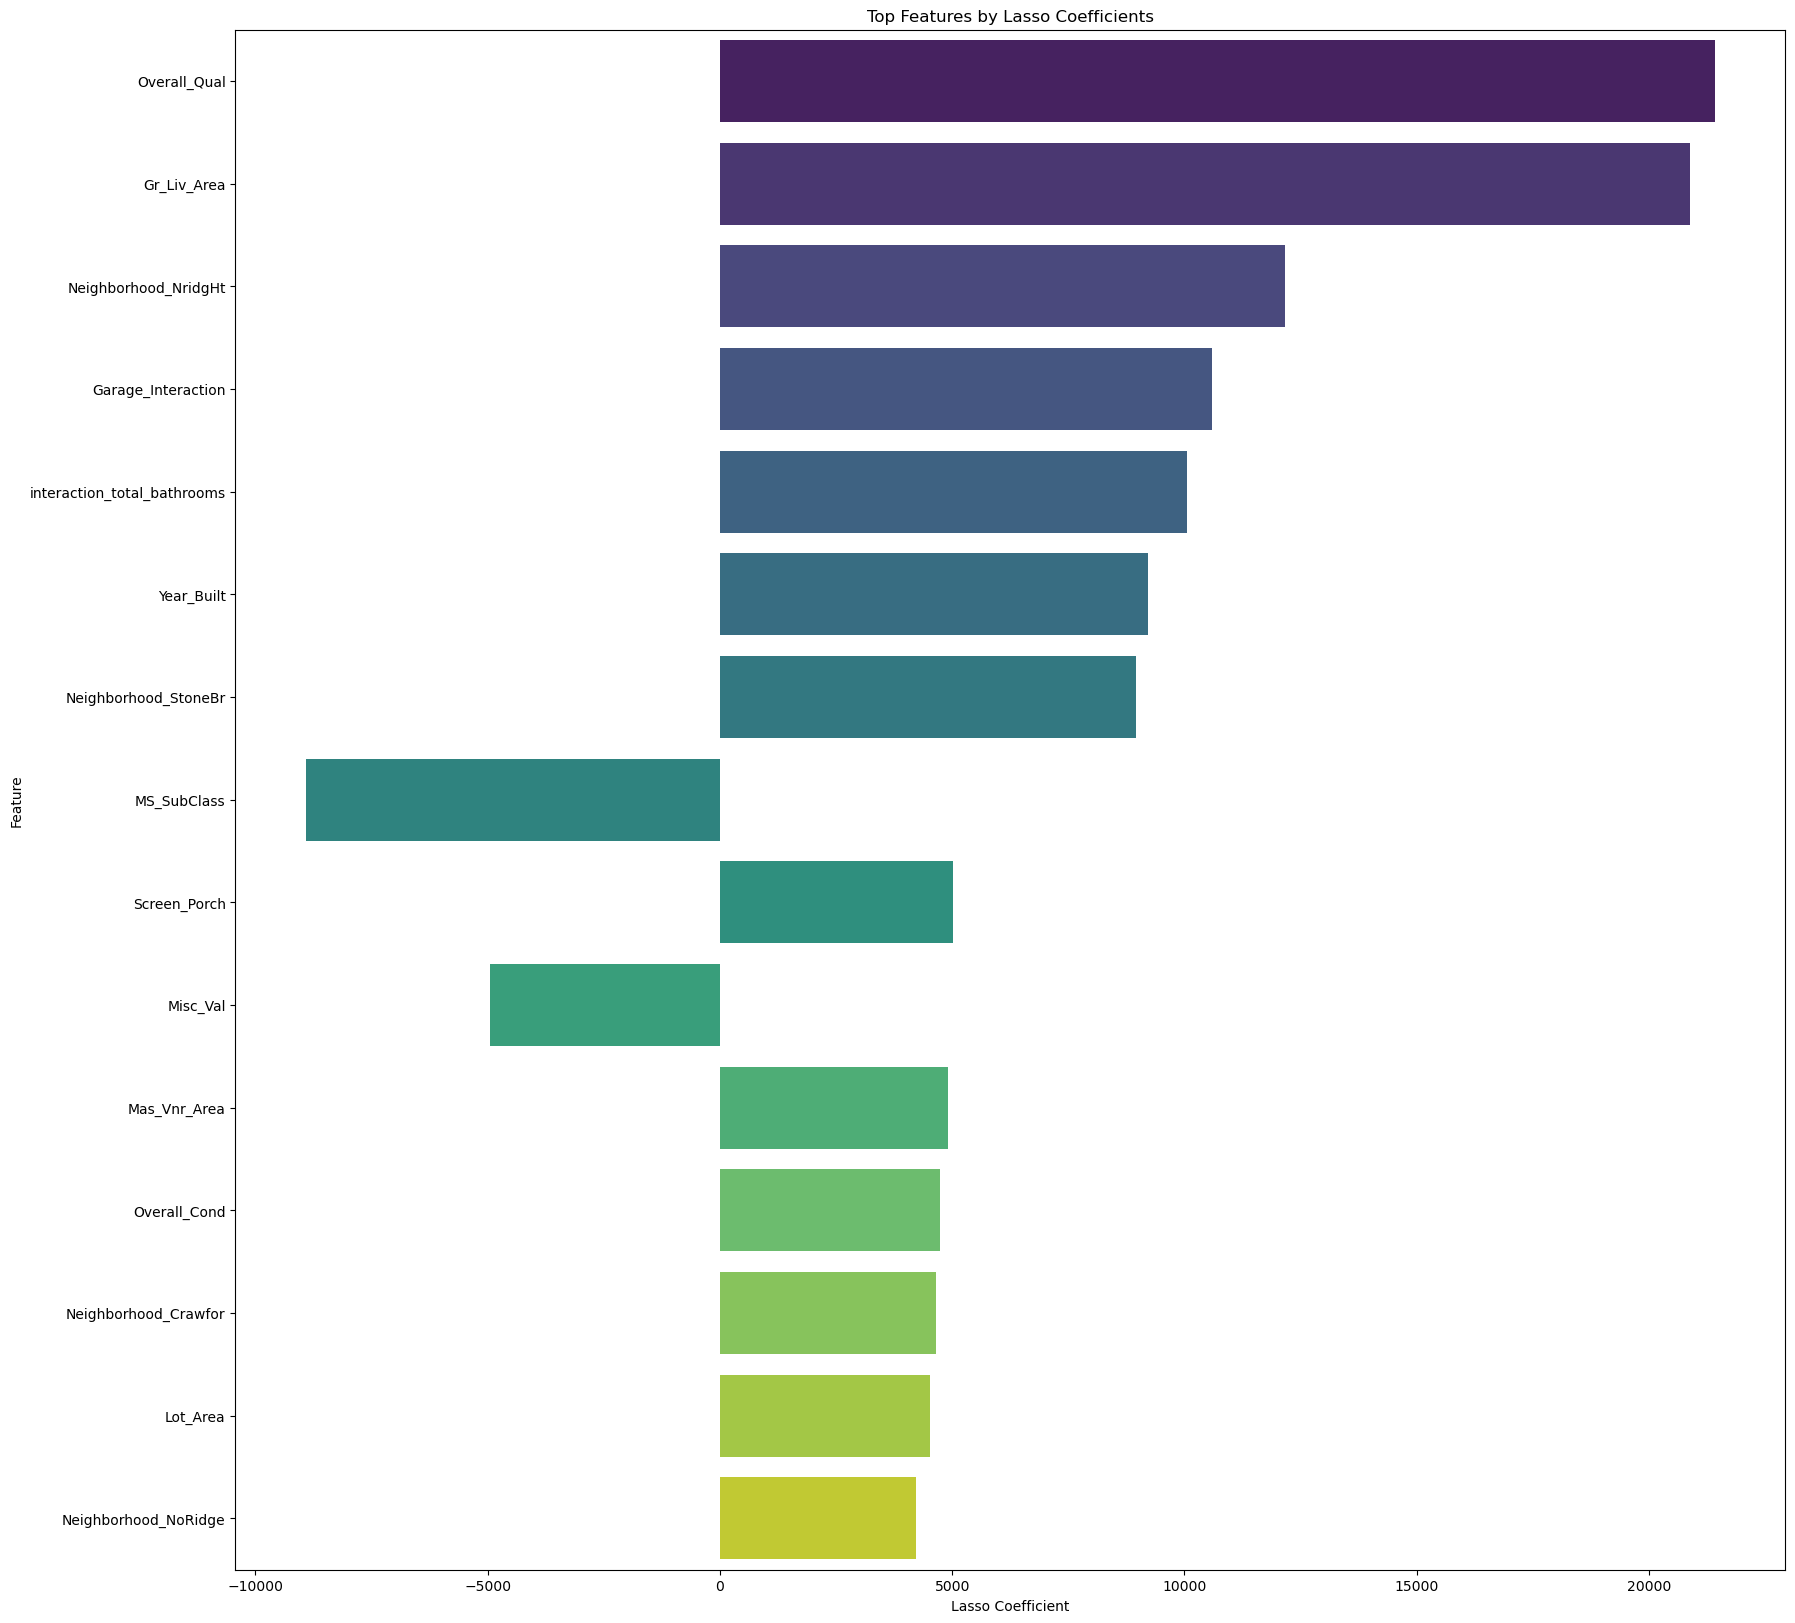

In [15]:
# Bar graph showing top features based on lasso Model
top_n_features = 15
plt.figure(figsize=(20, 20))
sns.barplot(x='Coefficient', y='Feature', data=lasso_feature_importance.head(top_n_features), palette='viridis')
plt.title('Top Features by Lasso Coefficients')
plt.xlabel('Lasso Coefficient')
plt.ylabel('Feature')
plt.savefig('../images/coefficients.png')
plt.show()

**Interpretation**

This bar plot shows the top features based on Lasso coefficients. Features with higher positive coefficients contribute positively to the Sale Price, while features with higher negative coefficients contribute negatively. Overall Quality, Gr Liv Area, Neighborhood Northridge Heights, year built, Neighborhood Stone Brook and the total bathrooms a house has and the size of the Garage from the interaction term created, all shows positive robust correlation with sale price.

In [16]:
#attain feature coefficients from Ridge model
ridge_coefficients = ridge_model.coef_

In [17]:
# DataFrame to store feature names and their coefficients
ridge_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefficients})

In [18]:
# Sort features by absolute coefficient values for visualization purposes
ridge_feature_importance = ridge_feature_importance.reindex(ridge_feature_importance['Coefficient'].abs().sort_values(ascending=False).index)


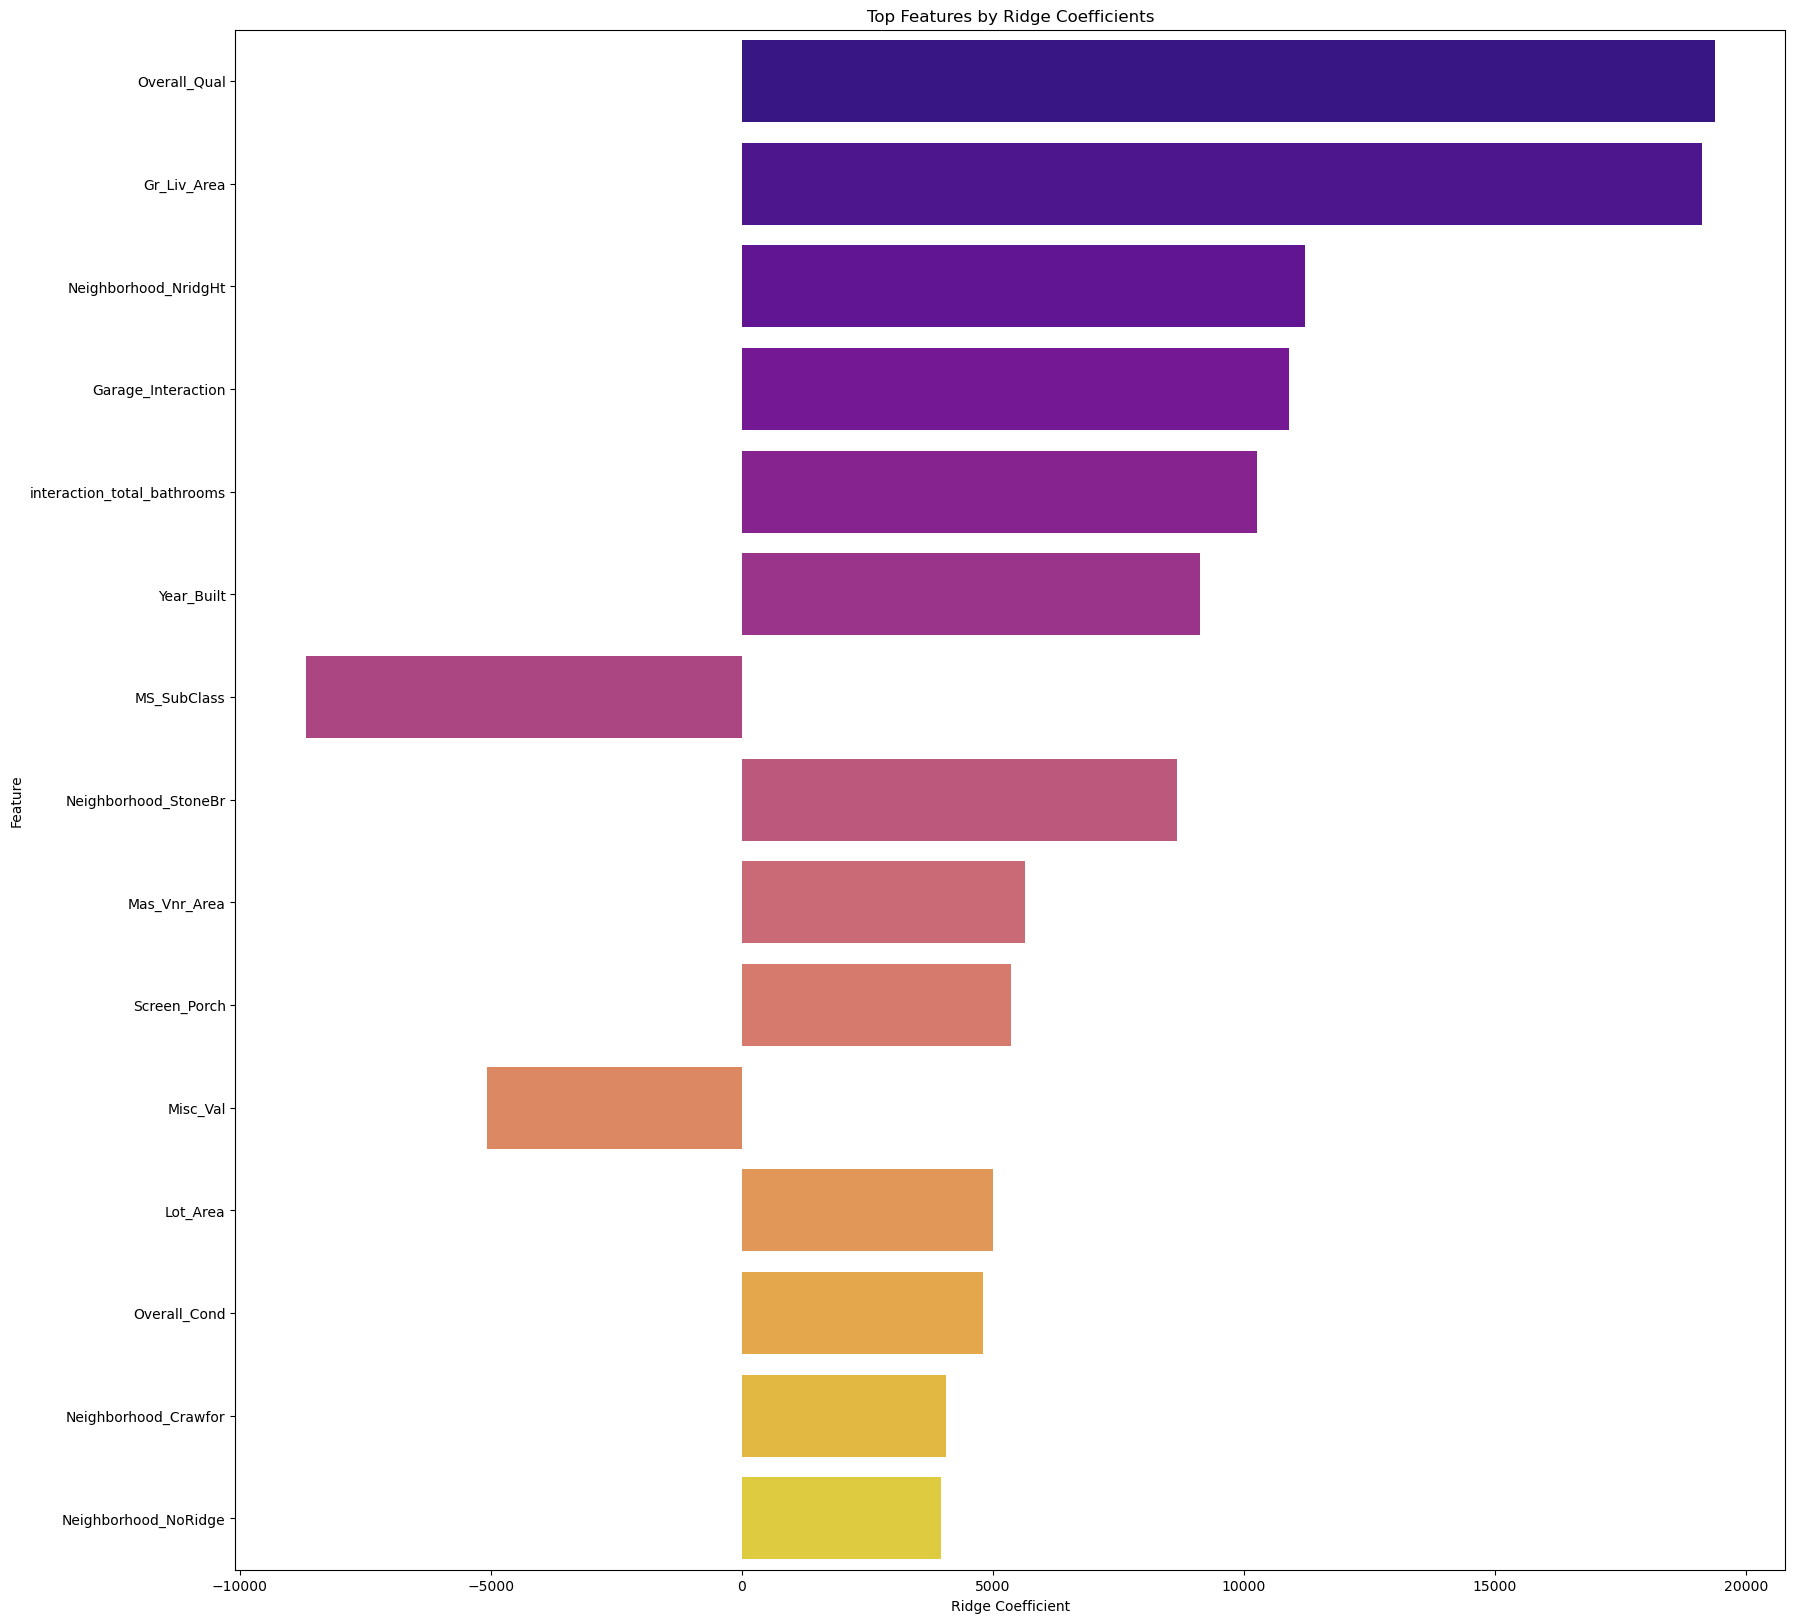

In [19]:
# Bar graph showing top features based on Ridge Model
top_n_features = 15
plt.figure(figsize=(20, 20))
sns.barplot(x='Coefficient', y='Feature', data=ridge_feature_importance.head(top_n_features), palette='plasma')
plt.title('Top Features by Ridge Coefficients')
plt.xlabel('Ridge Coefficient')
plt.ylabel('Feature')
plt.show()

**Interpretation**

Not a huge divergence from the lasso model. Both model perform well. Just small changes in coeffcient metrics.

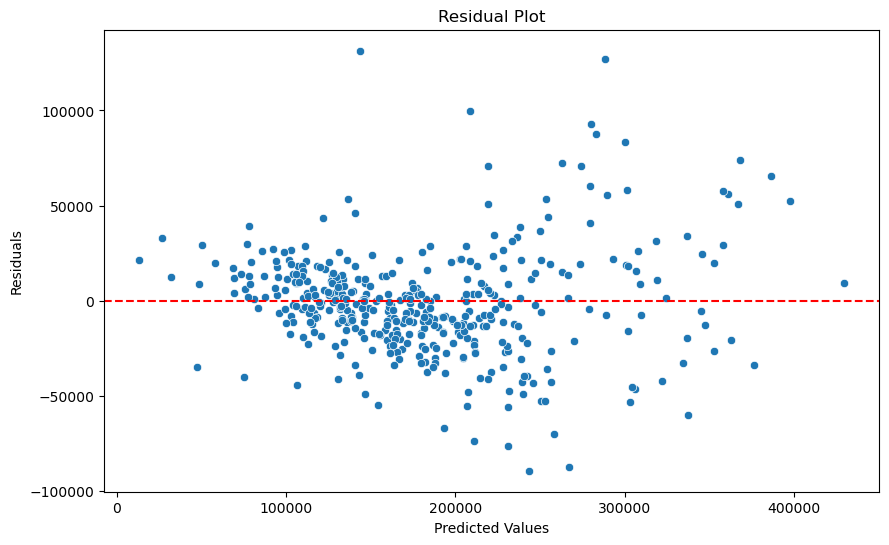

In [20]:
# Example: Residual Plot
residuals = y_test - y_pred_lasso_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lasso_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('../images/residual.png')
plt.show()


In [21]:
residuals_summary = pd.DataFrame({'Residuals': residuals})
print(residuals_summary.describe())

           Residuals
count     411.000000
mean    -1170.477039
std     27939.270944
min    -89203.693244
25%    -16294.510321
50%     -2117.081993
75%     12469.394778
max    131337.545516


The mean (average) residual is approximately -1170.48. This indicates that, on average, the model tends to underestimate the sale prices. In Summary, the model tends to have a slightly negative bias on average, and there is considerable variability in prediction errors as seen with the standard deviation score. However, the Residuals on the plot are randomly scattered around the horizontal axis, indicating that the model's predictions are unbiased and capturing the underlying patterns in the data.

## Actionable Insight to Investors on the Key Features that Influence Property Values

In the context of Lasso regression model, the coefficients represented the strength and direction of the relationship between each feature and the target variable of Sale Price. The actionable insight that can be drawn from the data from this notebook are listed below:

- The feature of Overall Quality (OverallQual) has a very high positive coefficient that indicates that higher overall quality of a house positively influences its sale price. Buyers are willing to pay more for houses with better quality. Most in the range of 8 to 10 as the boxplot would show, where buyers are willing to pay extreme value for houses with a good quality score.

- The feature of Gr Liv Area (Above Ground Living Area) has a very high positive coefficient that indicates that larger above-ground living area positively correlates with higher sale prices. More living space tends to increase the value of a property.

- The feature of Neighborhood Northridge Heights and Stone Brook has a very high positive coefficient that suggest that being in the Northridge Heights or Stone Brook neighborhood is associated with higher sale prices. This specific neighborhood may have characteristics or amenities that contribute to increased property values. Perhaps a country club, good school, safety, sport center, great restaurants, etc.

- The feature of Year Built has a very high positive coefficient that indicates a positive correlation between the year a house was built and its sale price. Newer houses might be perceived as more valuable due to modern features and construction.

- The feature of Total Bathrooms (Interaction Term) has a very high positive coefficient that indicates the number of full bathrooms and half bathrooms suggests a positive relationship with sale price. Houses with more bathrooms or a specific combination may command higher prices.


- On the other side of the spectrum, MS SubClass that identifies the type of dwelling involved in the sale and Miscellaneous feature like elavator, tennis court, shed, etc implies lower sale prices. This could mean that houses classified under specific categories may be less desirable or have lower market value. Whereas, with Miscellaneous feature, even though it seems counterintuitive, the data shows that these features are not valued highly by potential buyers in this particular housing market.


In [ ]:
# # Save preprocessed data to a CSV file
# df_cleaned.to_csv('../data/test_clean5.csv', index=False) 